# pyIsoDep

Copyright (c) Dan Kotlyar

# A scenario with multiple cross section sets

##  Description

Example on how to execute a full depletion calculations.

## Load modules

In [2]:
import numpy as np
from pyIsoDep.functions.maindepletionsolver import MainDepletion
from pyIsoDep.functions.generatedata import TransmutationData
from pyIsoDep.functions.postprocessresults import Results
from pyIsoDep.functions.read_csv import ReadCsv

### Data Generation Stage

In [3]:
FY_WGT = 0.0  # determines the fission yield wieghting
VOL = 332097.8  # cm^3

xsTable, fields = ReadCsv("./bootstrap.csv")
bootstrap = TransmutationData(libraryFlag=True, wgtFY=1.0)
bootstrap.ReadData(ID=xsTable[:, 0], sig_f=xsTable[:, 3], sig_c=xsTable[:, 2],
                   sig_alpha=xsTable[:, 4], flagBarns=True)

xsTable, fields = ReadCsv("./tempramp.csv")
tempramp = TransmutationData(libraryFlag=True, wgtFY=1.0)
tempramp.ReadData(ID=xsTable[:, 0], sig_f=xsTable[:, 3], sig_c=xsTable[:, 2],
                  sig_alpha=xsTable[:, 4], flagBarns=True)

xsTable, fields = ReadCsv("./fullthrust.csv")
fullthrust = TransmutationData(libraryFlag=True, wgtFY=1.0)
fullthrust.ReadData(ID=xsTable[:, 0], sig_f=xsTable[:, 3], sig_c=xsTable[:, 2],
                    sig_alpha=xsTable[:, 4], flagBarns=True)

### Depletion Stage

#### Execute Depletion

In [4]:
dep = MainDepletion([0.0, 5.5, 30.0], bootstrap, tempramp, fullthrust)
# define metadata (steps, flux, and so on)
power = 1E+6*np.array([16.545, 118.49, 272.52, 330.22, 272.52, 214.82, 118.49])
dt = np.array([5.5, 24.5, 7., 1800., 7., 180., 40.])
dep.SetDepScenario(power=power, timeUnits="seconds", timesteps=dt)
# set initial composition
dep.SetInitialComposition(xsTable[:, 0], xsTable[:, 1], vol=VOL)
# solve the Bateman equations
dep.SolveDepletion(method="cram", xsinterp=False)

#### Post depletion analysis

In [5]:
dep.DecayHeat()
dep.Radiotoxicity()
dep.Activity()
dep.Mass()

### Post-process results

In [6]:
res = Results(dep)

In [7]:
res.getvalues("totalQt")

array([2.26062673e-03, 2.31077846e+05, 2.92441792e+06, 5.53613244e+06,
       1.57902852e+07, 1.48928810e+07, 1.16482768e+07, 8.88484757e+06])

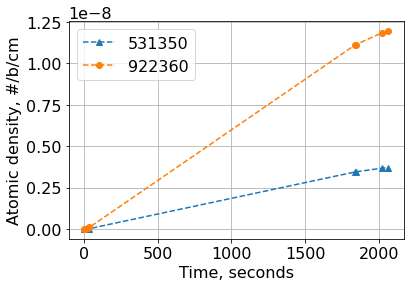

In [11]:
res.plot("Nt", timeUnits="seconds", markers=['--^', '--o'], isotopes=[531350, 922360],
         ylabel="Atomic density, #/b/cm")

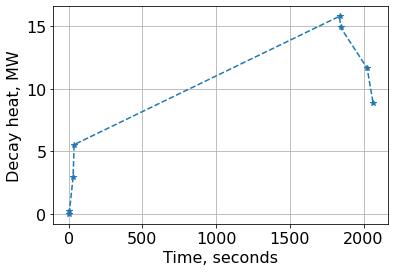

In [12]:
res.plot("totalQt", timeUnits="seconds", norm=1E+6, ylabel="Decay heat, MW")

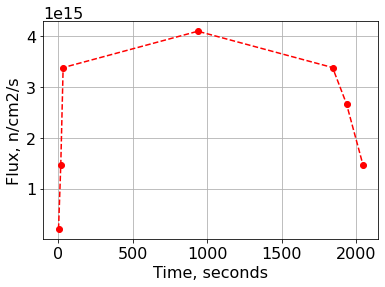

In [13]:
res.plot("flux", timeUnits="seconds", markers="--ro", ylabel="Flux, n/cm2/s")